In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import pylab as pl
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA
from sklearn.metrics import mean_squared_error
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def getHouston311Data(year):
    ''' Function to scrape the various datasets from the 311 website of Houston
        year = The year of the data needed(or an event like Harvey)
    '''
    #Check file
    if not os.path.isfile('311-Public-Data-Extract-' + year + '-clean.txt'):
        print ("Downloading file") 
        os.system("curl -O http://hfdapp.houstontx.gov/311/311-Public-Data-Extract-" + year + \
                      "-clean.txt ")

    # Check:
    if not os.path.isfile('311-Public-Data-Extract-' + year + '-clean.txt'):
        print ("WARNING!!! Something is wrong: the file is not there!")

    else:
        print ("File in place, you can continue")

#Set date and download

In [3]:
getHouston311Data('2014')
getHouston311Data('2015')
getHouston311Data('2016')
getHouston311Data('2017')
getHouston311Data('2018')
getHouston311Data('Harvey')

File in place, you can continue
File in place, you can continue
File in place, you can continue
File in place, you can continue
File in place, you can continue
File in place, you can continue


### The link for the above datasets is "https://www.houstontx.gov/311/"

In [4]:
harvey_2014 = pd.read_csv('311-Public-Data-Extract-2014-clean.txt',delimiter='|',infer_datetime_format=True,
                          error_bad_lines=False)#,parse_dates=)
harvey_2015 = pd.read_csv('311-Public-Data-Extract-2015-clean.txt',delimiter='|'\
                          , error_bad_lines=False ,infer_datetime_format=True)#,parse_dates=)
harvey_2016 = pd.read_csv('311-Public-Data-Extract-2016-clean.txt',delimiter='|'\
                          , error_bad_lines=False ,infer_datetime_format=True)
harvey_2017 = pd.read_csv('311-Public-Data-Extract-2017-clean.txt',delimiter='|'\
                          , error_bad_lines=False ,infer_datetime_format=True)
harvey_2018 = pd.read_csv('311-Public-Data-Extract-2018-clean.txt',delimiter='|'\
                          , error_bad_lines=False ,infer_datetime_format=True)
harvey = pd.read_csv('311-Public-Data-Extract-Harvey-clean.txt',delimiter='|'\
                          , error_bad_lines=False ,infer_datetime_format=True)

b'Skipping line 99734: expected 29 fields, saw 30\n'
b'Skipping line 142004: expected 29 fields, saw 30\nSkipping line 142593: expected 29 fields, saw 30\nSkipping line 153307: expected 29 fields, saw 30\n'
b'Skipping line 191133: expected 29 fields, saw 30\nSkipping line 193661: expected 29 fields, saw 30\n'
b'Skipping line 207621: expected 29 fields, saw 30\nSkipping line 219587: expected 29 fields, saw 30\nSkipping line 225099: expected 29 fields, saw 30\n'
b'Skipping line 277030: expected 29 fields, saw 30\n'
b'Skipping line 78774: expected 29 fields, saw 31\n'
b'Skipping line 105843: expected 29 fields, saw 30\n'
b'Skipping line 134103: expected 29 fields, saw 30\n'
b'Skipping line 168990: expected 29 fields, saw 30\n'
b'Skipping line 198468: expected 29 fields, saw 30\nSkipping line 220140: expected 29 fields, saw 30\n'
b'Skipping line 272891: expected 29 fields, saw 30\nSkipping line 282449: expected 29 fields, saw 30\n'
b'Skipping line 339858: expected 29 fields, saw 31\nSkippi

## Compiled for 2014,2015,2016,2017,2018

In [5]:
# Concating the years
harvey_compiled = pd.concat([harvey_2014,harvey_2015,harvey_2016,harvey_2017,harvey_2018]) 

In [6]:
harvey_compiled.head()

,CASE NUMBER,SR LOCATION,COUNTY,DISTRICT,NEIGHBORHOOD,TAX ID,TRASH QUAD,RECYCLE QUAD,TRASH DAY,HEAVY TRASH DAY,...,SR CREATE DATE,DUE DATE,DATE CLOSED,OVERDUE,Title,x,y,LATITUDE,LONGITUDE,Channel Type
0,0-101001233975,"13803 MILL GARDEN, HOUSTON TX 77059",HARRIS,E,CLEAR LAKE,1172600070011,NaN,NaN,NaN,NaN,...,2014-01-01 00:13:34,2014-09-10 08:30:00,2014-02-28 13:00:18,-193.81,"Nuisance on Property - Trash, Substances, Weed...",3.195276e+06,1.378570e+07,NaN,NaN,Voice In
1,24705-101001233976,"1314 WAVERLY, HOUSTON TX 77008",HARRIS,C,GREATER HEIGHTS,0201720000039,NW,SW,THURSDAY,3rd Wednesday,...,2014-01-01 00:21:16,2014-01-04 00:21:16,2014-01-01 05:59:44,-2.76,Other - 24705,3.108691e+06,1.385409e+07,NaN,NaN,WAP
2,101001233977,"4107 CAVALCADE, HOUSTON TX 77026",HARRIS,B,KASHMERE GARDENS,0660030000026,NE,NW,FRIDAY,1st Thursday,...,2014-01-01 00:23:46,2014-01-08 00:23:46,2014-01-03 16:44:47,-4.32,New Resident Trash Service (First Container)-1...,3.132222e+06,1.385689e+07,29.80056661,-95.33012713,Voice In
3,101001233978,"208 ELEANOR, HOUSTON TX 77009",HARRIS,H,NEAR NORTHSIDE,0660640400022,NE,NW,FRIDAY,1st Friday,...,2014-01-01 00:36:52,2014-01-08 00:36:52,2014-01-03 16:49:37,-4.32,New Resident Trash Service (First Container)-1...,3.119800e+06,1.386069e+07,NaN,NaN,Voice In
4,101001233979,"208 ELEANOR, HOUSTON TX 77009",HARRIS,H,NEAR NORTHSIDE,0660640400022,NE,NW,FRIDAY,1st Friday,...,2014-01-01 00:37:31,2014-01-23 12:40:00,2014-01-09 12:42:18,-14.00,Request a New Recycling Container-101001233979,3.119800e+06,1.386069e+07,NaN,NaN,Voice In


In [7]:
harvey_compiled.rename({'CASE NUMBER':'Case_Number',
       'SR LOCATION':'Request_Location','COUNTY':'County', 'DISTRICT':'District',
       'NEIGHBORHOOD':'Neighborhood', 'TAX ID':'Tax_id',
       'TRASH QUAD':'Trash_Quad', 'RECYCLE QUAD':'Recycle_Quad', 'TRASH DAY':'Trash_Day',
       'HEAVY TRASH DAY':'Heavy_Trash_Day', 'RECYCLE DAY':'Recycle_Day', 'KEY MAP':'Key_Map',
       'MANAGEMENT DISTRICT':'Management_District','DEPARTMENT':'Department',
       'DIVISION':'Division', 'SR TYPE':'SR_Type','QUEUE':'Queue', 
        'SLA':'Service_Level_Agreement_Days','STATUS':'Status', 
               'SR CREATE DATE':'Service_Request_Creation_Date', 'DUE DATE':'Due_Date',
       'DATE CLOSED':'Date_Closed', 'OVERDUE':'Overdue',
       'Title':'Request_Title',
       'x':'X_Coords_ESRI', 'y':'Y_Coords_ESRI', 'LATITUDE':'Latitude',
       'LONGITUDE':'Longitude', 'Channel Type':'Channel_Type', 'Unnamed: 29':'Unnamed_29','month':'Month'},axis=1,inplace=True)

In [8]:
harvey_compiled.head()

,Case_Number,Request_Location,County,District,Neighborhood,Tax_id,Trash_Quad,Recycle_Quad,Trash_Day,Heavy_Trash_Day,...,Service_Request_Creation_Date,Due_Date,Date_Closed,Overdue,Request_Title,X_Coords_ESRI,Y_Coords_ESRI,Latitude,Longitude,Channel_Type
0,0-101001233975,"13803 MILL GARDEN, HOUSTON TX 77059",HARRIS,E,CLEAR LAKE,1172600070011,NaN,NaN,NaN,NaN,...,2014-01-01 00:13:34,2014-09-10 08:30:00,2014-02-28 13:00:18,-193.81,"Nuisance on Property - Trash, Substances, Weed...",3.195276e+06,1.378570e+07,NaN,NaN,Voice In
1,24705-101001233976,"1314 WAVERLY, HOUSTON TX 77008",HARRIS,C,GREATER HEIGHTS,0201720000039,NW,SW,THURSDAY,3rd Wednesday,...,2014-01-01 00:21:16,2014-01-04 00:21:16,2014-01-01 05:59:44,-2.76,Other - 24705,3.108691e+06,1.385409e+07,NaN,NaN,WAP
2,101001233977,"4107 CAVALCADE, HOUSTON TX 77026",HARRIS,B,KASHMERE GARDENS,0660030000026,NE,NW,FRIDAY,1st Thursday,...,2014-01-01 00:23:46,2014-01-08 00:23:46,2014-01-03 16:44:47,-4.32,New Resident Trash Service (First Container)-1...,3.132222e+06,1.385689e+07,29.80056661,-95.33012713,Voice In
3,101001233978,"208 ELEANOR, HOUSTON TX 77009",HARRIS,H,NEAR NORTHSIDE,0660640400022,NE,NW,FRIDAY,1st Friday,...,2014-01-01 00:36:52,2014-01-08 00:36:52,2014-01-03 16:49:37,-4.32,New Resident Trash Service (First Container)-1...,3.119800e+06,1.386069e+07,NaN,NaN,Voice In
4,101001233979,"208 ELEANOR, HOUSTON TX 77009",HARRIS,H,NEAR NORTHSIDE,0660640400022,NE,NW,FRIDAY,1st Friday,...,2014-01-01 00:37:31,2014-01-23 12:40:00,2014-01-09 12:42:18,-14.00,Request a New Recycling Container-101001233979,3.119800e+06,1.386069e+07,NaN,NaN,Voice In


In [9]:
harvey_compiled.Service_Request_Creation_Date = \
                    pd.to_datetime(harvey_compiled.Service_Request_Creation_Date, errors= 'coerce')
harvey_compiled.Date_Closed = \
                    pd.to_datetime(harvey_compiled.Date_Closed, errors= 'coerce')
harvey_compiled.Due_Date = \
                    pd.to_datetime(harvey_compiled.Due_Date, errors= 'coerce')

In [10]:
harvey_compiled['Service_Request_Creation_Date'] = harvey_compiled.Service_Request_Creation_Date.dt.date
harvey_compiled.Date_Closed = harvey_compiled.Date_Closed.dt.date
harvey_compiled.Due_Date = harvey_compiled.Due_Date.dt.date

In [11]:
harvey_compiled_sub = harvey_compiled[['Case_Number','SR_Type','Service_Level_Agreement_Days'\
                                       ,'Service_Request_Creation_Date','Due_Date','Date_Closed','Overdue']]

In [12]:
harvey_compiled_sub.loc[:,'Service_Level_Agreement_Days'] = pd.to_numeric(harvey_compiled_sub.Service_Level_Agreement_Days,errors='coerce')

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [13]:
len(harvey_compiled)

1756670

In [16]:
len(harvey_compiled.SR_Type.unique())

275

In [15]:
harvey_compiled.head()

,Case_Number,Request_Location,County,District,Neighborhood,Tax_id,Trash_Quad,Recycle_Quad,Trash_Day,Heavy_Trash_Day,...,Service_Request_Creation_Date,Due_Date,Date_Closed,Overdue,Request_Title,X_Coords_ESRI,Y_Coords_ESRI,Latitude,Longitude,Channel_Type
0,0-101001233975,"13803 MILL GARDEN, HOUSTON TX 77059",HARRIS,E,CLEAR LAKE,1172600070011,NaN,NaN,NaN,NaN,...,2014-01-01,2014-09-10,2014-02-28,-193.81,"Nuisance on Property - Trash, Substances, Weed...",3.195276e+06,1.378570e+07,NaN,NaN,Voice In
1,24705-101001233976,"1314 WAVERLY, HOUSTON TX 77008",HARRIS,C,GREATER HEIGHTS,0201720000039,NW,SW,THURSDAY,3rd Wednesday,...,2014-01-01,2014-01-04,2014-01-01,-2.76,Other - 24705,3.108691e+06,1.385409e+07,NaN,NaN,WAP
2,101001233977,"4107 CAVALCADE, HOUSTON TX 77026",HARRIS,B,KASHMERE GARDENS,0660030000026,NE,NW,FRIDAY,1st Thursday,...,2014-01-01,2014-01-08,2014-01-03,-4.32,New Resident Trash Service (First Container)-1...,3.132222e+06,1.385689e+07,29.80056661,-95.33012713,Voice In
3,101001233978,"208 ELEANOR, HOUSTON TX 77009",HARRIS,H,NEAR NORTHSIDE,0660640400022,NE,NW,FRIDAY,1st Friday,...,2014-01-01,2014-01-08,2014-01-03,-4.32,New Resident Trash Service (First Container)-1...,3.119800e+06,1.386069e+07,NaN,NaN,Voice In
4,101001233979,"208 ELEANOR, HOUSTON TX 77009",HARRIS,H,NEAR NORTHSIDE,0660640400022,NE,NW,FRIDAY,1st Friday,...,2014-01-01,2014-01-23,2014-01-09,-14.00,Request a New Recycling Container-101001233979,3.119800e+06,1.386069e+07,NaN,NaN,Voice In


In [16]:
top_20 = ['Storm Debris Collection',
       'Missed Garbage Pickup',
       'Container Problem',
       'Traffic Signal Maintenance',
       'Water Leak',
       'Flooding',
       'Sewer Wastewater',
       'Street Hazard',
       'Nuisance On Property',
       'Drainage',
       'Water Service',
       'Traffic Signs',
       'Crisis Cleanup',
       'Unclassified 311 Web Request',
       'Recycling Cart Repair or Replace',
       'Parking Violation',
       'Traffic Signals',
       'Dead Animal Collection',
       'SWM Escalation',
       'New Resident Container']

In [17]:
# Top 20 SR_Type requests by number of requests
# harvey_compiled[['Case_Number', 'SR_Type']].groupby('SR_Type').count().sort_values('Case_Number', ascending=False).head(20).reset_index()

In [18]:
# harvey_compiled.groupby(['just_date', 'SR_Type']).count().reset_index()

In [19]:
harvey_compiled.loc[harvey_compiled['SR_Type']\
                .isin(top_20)][['SR_Type','Overdue']].groupby('SR_Type').mean()

,Overdue
SR_Type,
Container Problem,6.010425
Crisis Cleanup,74.118819
Dead Animal Collection,-1.618418
Drainage,-22.865161
Flooding,1.057409
Missed Garbage Pickup,-1.241511
New Resident Container,2.661863
Nuisance On Property,-138.167398
Parking Violation,-11.792845


## Harvey time

In [20]:
harvey.head()

,CASE NUMBER,SR LOCATION,COUNTY,DISTRICT,NEIGHBORHOOD,TAX ID,TRASH QUAD,RECYCLE QUAD,TRASH DAY,HEAVY TRASH DAY,...,SR CREATE DATE,DUE DATE,DATE CLOSED,OVERDUE,Title,x,y,LATITUDE,LONGITUDE,Channel Type
0,12161731-101002716483,"5303 PALMETTO, HOUSTON TX 77081",HARRIS,J,GULFTON,1203000010001,SW,SE,TUESDAY,1st Friday,...,2017-08-23 00:06:56,2017-08-25 00:06:55,2017-08-23 00:30:19,-1.98,Water Service-101002716483,3.087909e+06,1.382325e+07,29.71184581,-95.47298327,Voice In
1,101002716484,"8131 LOYAL, HOUSTON TX 77016",HARRIS,B,EAST LITTLE YORK / HOMESTEAD,1276500020029,NE,NW,TUESDAY,2nd Monday,...,2017-08-23 00:37:34,2017-08-29 08:00:00,2017-08-23 11:12:52,-5.87,Missed Garbage Collection-101002716484,3.147801e+06,1.388005e+07,29.86285934,-95.27870914,Voice In
2,12161732-101002716485,Intersection 5200 DUNLAVY ST&1700 SOUTH BLVD,Harris County,C,UNIVERSITY PLACE,NaN,NaN,NaN,NaN,NaN,...,2017-08-23 00:44:19,2017-09-02 00:44:19,2017-08-25 06:10:15,-7.77,Water Leak-101002716485,3.110241e+06,1.382932e+07,29.72665013,-95.40207675,Voice In
3,12161733-101002716486,"5419 GULFTON, HOUSTON TX 77081",HARRIS,J,GULFTON,0762180000004,SW,SE,TUESDAY,1st Friday,...,2017-08-23 00:50:09,2017-08-25 00:50:09,2017-08-23 01:00:14,-1.99,Water Service-101002716486,3.087136e+06,1.382474e+07,29.71599619,-95.47527561,Voice In
4,101002716487,Intersection 5000 KIRKPATRICK BLVD&0 N LOOP FWY E,Harris County,B,TRINITY / HOUSTON GARDENS,NaN,NaN,NaN,NaN,NaN,...,2017-08-23 00:53:01,2017-08-27 00:53:01,2017-08-23 17:00:14,-3.33,Remove Dead Animal from City Street or Curb-10...,3.144472e+06,1.385882e+07,29.8048057,-95.29132843,Voice In


In [21]:
harvey.rename({'CASE NUMBER':'Case_Number',
       'SR LOCATION':'Request_Location','COUNTY':'County', 'DISTRICT':'District',
       'NEIGHBORHOOD':'Neighborhood', 'TAX ID':'Tax_id',
       'TRASH QUAD':'Trash_Quad', 'RECYCLE QUAD':'Recycle_Quad', 'TRASH DAY':'Trash_Day',
       'HEAVY TRASH DAY':'Heavy_Trash_Day', 'RECYCLE DAY':'Recycle_Day', 'KEY MAP':'Key_Map',
       'MANAGEMENT DISTRICT':'Management_District','DEPARTMENT':'Department',
       'DIVISION':'Division', 'SR TYPE':'SR_Type','QUEUE':'Queue', 
        'SLA':'Service_Level_Agreement_Days','STATUS':'Status', 
               'SR CREATE DATE':'Service_Request_Creation_Date', 'DUE DATE':'Due_Date',
       'DATE CLOSED':'Date_Closed', 'OVERDUE':'Overdue',
       'Title':'Request_Title',
       'x':'X_Coords_ESRI', 'y':'Y_Coords_ESRI', 'LATITUDE':'Latitude',
       'LONGITUDE':'Longitude', 'Channel Type':'Channel_Type', 'Unnamed: 29':'Unnamed_29','month':'Month'},axis=1,inplace=True)

In [22]:
harvey.head()

,Case_Number,Request_Location,County,District,Neighborhood,Tax_id,Trash_Quad,Recycle_Quad,Trash_Day,Heavy_Trash_Day,...,Service_Request_Creation_Date,Due_Date,Date_Closed,Overdue,Request_Title,X_Coords_ESRI,Y_Coords_ESRI,Latitude,Longitude,Channel_Type
0,12161731-101002716483,"5303 PALMETTO, HOUSTON TX 77081",HARRIS,J,GULFTON,1203000010001,SW,SE,TUESDAY,1st Friday,...,2017-08-23 00:06:56,2017-08-25 00:06:55,2017-08-23 00:30:19,-1.98,Water Service-101002716483,3.087909e+06,1.382325e+07,29.71184581,-95.47298327,Voice In
1,101002716484,"8131 LOYAL, HOUSTON TX 77016",HARRIS,B,EAST LITTLE YORK / HOMESTEAD,1276500020029,NE,NW,TUESDAY,2nd Monday,...,2017-08-23 00:37:34,2017-08-29 08:00:00,2017-08-23 11:12:52,-5.87,Missed Garbage Collection-101002716484,3.147801e+06,1.388005e+07,29.86285934,-95.27870914,Voice In
2,12161732-101002716485,Intersection 5200 DUNLAVY ST&1700 SOUTH BLVD,Harris County,C,UNIVERSITY PLACE,NaN,NaN,NaN,NaN,NaN,...,2017-08-23 00:44:19,2017-09-02 00:44:19,2017-08-25 06:10:15,-7.77,Water Leak-101002716485,3.110241e+06,1.382932e+07,29.72665013,-95.40207675,Voice In
3,12161733-101002716486,"5419 GULFTON, HOUSTON TX 77081",HARRIS,J,GULFTON,0762180000004,SW,SE,TUESDAY,1st Friday,...,2017-08-23 00:50:09,2017-08-25 00:50:09,2017-08-23 01:00:14,-1.99,Water Service-101002716486,3.087136e+06,1.382474e+07,29.71599619,-95.47527561,Voice In
4,101002716487,Intersection 5000 KIRKPATRICK BLVD&0 N LOOP FWY E,Harris County,B,TRINITY / HOUSTON GARDENS,NaN,NaN,NaN,NaN,NaN,...,2017-08-23 00:53:01,2017-08-27 00:53:01,2017-08-23 17:00:14,-3.33,Remove Dead Animal from City Street or Curb-10...,3.144472e+06,1.385882e+07,29.8048057,-95.29132843,Voice In


In [23]:
harvey.Service_Request_Creation_Date = \
                    pd.to_datetime(harvey.Service_Request_Creation_Date, errors= 'coerce')
harvey.Date_Closed = \
                    pd.to_datetime(harvey.Date_Closed, errors= 'coerce')
harvey.Due_Date = \
                    pd.to_datetime(harvey.Due_Date, errors= 'coerce')

In [24]:
harvey['Service_Request_Creation_Date'] = harvey.Service_Request_Creation_Date.dt.date
harvey.Date_Closed = harvey.Date_Closed.dt.date
harvey.Due_Date = harvey.Due_Date.dt.date

In [25]:
harvey_sub = harvey[['Case_Number','SR_Type','Service_Level_Agreement_Days'\
                                       ,'Service_Request_Creation_Date','Due_Date','Date_Closed','Overdue']]

In [26]:
harvey_sub.loc[:,'Service_Level_Agreement_Days'] = pd.to_numeric(harvey_sub.Service_Level_Agreement_Days,errors='coerce')

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [27]:
harvey_sub.head()

,Case_Number,SR_Type,Service_Level_Agreement_Days,Service_Request_Creation_Date,Due_Date,Date_Closed,Overdue
0,12161731-101002716483,Water Service,2.0,2017-08-23,2017-08-25,2017-08-23,-1.98
1,101002716484,Missed Garbage Pickup,4.0,2017-08-23,2017-08-29,2017-08-23,-5.87
2,12161732-101002716485,Water Leak,10.0,2017-08-23,2017-09-02,2017-08-25,-7.77
3,12161733-101002716486,Water Service,2.0,2017-08-23,2017-08-25,2017-08-23,-1.99
4,101002716487,Dead Animal Collection,4.0,2017-08-23,2017-08-27,2017-08-23,-3.33


In [28]:
# Top 20 SR_Type requests by number of requests
# harvey_compiled[['Case_Number', 'SR_Type']].groupby('SR_Type').count().sort_values('Case_Number', ascending=False).head(20).reset_index()

In [29]:
# harvey_compiled.groupby(['just_date', 'SR_Type']).count().reset_index()

In [30]:
harvey.loc[harvey['SR_Type']\
                .isin(top_20)][['SR_Type','Overdue']].groupby('SR_Type').mean(),harvey_compiled.loc[harvey_compiled['SR_Type']\
                .isin(top_20)][['SR_Type','Overdue']].groupby('SR_Type').mean()

(                                     Overdue
 SR_Type                                     
 Container Problem                  28.679741
 Crisis Cleanup                      3.533351
 Dead Animal Collection             -2.557025
 Drainage                          -16.739698
 Flooding                            1.159793
 Missed Garbage Pickup              -0.970756
 New Resident Container              9.482291
 Nuisance On Property             -196.128863
 Parking Violation                 -13.649832
 Recycling Cart Repair or Replace   35.422341
 SWM Escalation                     13.033351
 Sewer Wastewater                    3.145179
 Storm Debris Collection            19.439114
 Street Hazard                      -4.790116
 Traffic Signal Maintenance         -0.385849
 Traffic Signals                   -11.366099
 Traffic Signs                      -4.105809
 Unclassified 311 Web Request       -1.172730
 Water Leak                         -6.120340
 Water Service                    

In [31]:
# post Harvey
harvey.loc[harvey['SR_Type']\
                .isin(['Storm Debris Collection',
       'Missed Garbage Pickup','Container Problem',
       'Traffic Signal Maintenance',
       'Water Leak','Flooding'])][['SR_Type','Overdue']].groupby('SR_Type').describe()

Overdue                                       \
                              count       mean        std    min     25%   
SR_Type                                                                    
Container Problem            5630.0  28.679741  59.395766 -10.00  2.8325   
Flooding                     4397.0   1.159793   5.343616  -4.00 -1.9600   
Missed Garbage Pickup        5844.0  -0.970756   4.671939  -9.04 -4.8100   
Storm Debris Collection     10207.0  19.439114  35.744806  -5.00 -4.7500   
Traffic Signal Maintenance   4907.0  -0.385849   1.504501  -1.00 -0.9900   
Water Leak                   4504.0  -6.120340   8.320070 -10.00 -9.8700   

                                                     
                               50%      75%     max  
SR_Type                                              
Container Problem           17.285  33.9375  453.69  
Flooding                     0.010   2.6800   61.35  
Missed Garbage Pickup       -1.910   1.3700   22.38  
Storm Debris Collection     -4.040  66.7300  101.84  
Traffic Signal Maintenance  -0.920  -0.6000   10.50  
Water Leak                  -9.190  -6.1300  206.02

In [32]:
harvey_compiled.columns

Index(['Case_Number', 'Request_Location', 'County', 'District', 'Neighborhood',
       'Tax_id', 'Trash_Quad', 'Recycle_Quad', 'Trash_Day', 'Heavy_Trash_Day',
       'Recycle_Day', 'Key_Map', 'Management_District', 'Department',
       'Division', 'SR_Type', 'Queue', 'Service_Level_Agreement_Days',
       'Status', 'Service_Request_Creation_Date', 'Due_Date', 'Date_Closed',
       'Overdue', 'Request_Title', 'X_Coords_ESRI', 'Y_Coords_ESRI',
       'Latitude', 'Longitude', 'Channel_Type'],
      dtype='object')

In [33]:
# before_overdue_mean.plot(x='Overdue')

In [34]:
# before_overdue_mean.reset_index(inplace=True)
# after_overdue_mean.reset_index(inplace=True)

In [35]:
# ax,(f1,f2) = plt.subplots(1,2)
# f1 = before_overdue_mean.plot.bar(y='Overdue',x='SR_Type',ax=ax)

# f2 = after_overdue_mean.plot.bar(y='Overdue',x='SR_Type',ax=ax)

In [36]:
# plt.bar(before_overdue_mean['SR_Type'], before_overdue_mean['Overdue'], color='r')
# plt.bar(after_overdue_mean['SR_Type'], after_overdue_mean['Overdue'], color='b')
# plt.show()

In [37]:
harvey_sub['Days_taken_Normalized'] = ((harvey_sub.Date_Closed - harvey_sub.Service_Request_Creation_Date)/
                             np.timedelta64(1, "D")) / harvey_sub.Service_Level_Agreement_Days
harvey_compiled_sub['Days_taken_Normalized'] = ((harvey_compiled_sub.Date_Closed - harvey_compiled_sub.Service_Request_Creation_Date)/
                             np.timedelta64(1, "D")) / harvey_compiled_sub.Service_Level_Agreement_Days

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [38]:
harvey_sub.head()

,Case_Number,SR_Type,Service_Level_Agreement_Days,Service_Request_Creation_Date,Due_Date,Date_Closed,Overdue,Days_taken_Normalized
0,12161731-101002716483,Water Service,2.0,2017-08-23,2017-08-25,2017-08-23,-1.98,0.0
1,101002716484,Missed Garbage Pickup,4.0,2017-08-23,2017-08-29,2017-08-23,-5.87,0.0
2,12161732-101002716485,Water Leak,10.0,2017-08-23,2017-09-02,2017-08-25,-7.77,0.2
3,12161733-101002716486,Water Service,2.0,2017-08-23,2017-08-25,2017-08-23,-1.99,0.0
4,101002716487,Dead Animal Collection,4.0,2017-08-23,2017-08-27,2017-08-23,-3.33,0.0


In [39]:
harvey_compiled_sub.head()

,Case_Number,SR_Type,Service_Level_Agreement_Days,Service_Request_Creation_Date,Due_Date,Date_Closed,Overdue,Days_taken_Normalized
0,0-101001233975,Nuisance On Property,180.0,2014-01-01,2014-09-10,2014-02-28,-193.81,0.322222
1,24705-101001233976,Unclassified 311 Web Request,1.0,2014-01-01,2014-01-04,2014-01-01,-2.76,0.000000
2,101001233977,New Resident Container,12.0,2014-01-01,2014-01-08,2014-01-03,-4.32,0.166667
3,101001233978,New Resident Container,12.0,2014-01-01,2014-01-08,2014-01-03,-4.32,0.166667
4,101001233979,Recycling Participation NEW,24.0,2014-01-01,2014-01-23,2014-01-09,-14.00,0.333333


In [40]:
max(harvey_compiled_sub.Service_Request_Creation_Date)

datetime.date(2018, 12, 1)

In [41]:
harvey_compiled_sub = harvey_compiled_sub[(harvey_compiled_sub.Due_Date >= min(harvey_compiled_sub.Service_Request_Creation_Date))]

In [42]:
harvey_compiled_sub[harvey_compiled_sub.Due_Date < min(harvey_compiled_sub.Due_Date)]

,Case_Number,SR_Type,Service_Level_Agreement_Days,Service_Request_Creation_Date,Due_Date,Date_Closed,Overdue,Days_taken_Normalized


In [43]:
# before harvey
before_overdue_mean = harvey_compiled_sub.loc[harvey_compiled_sub['SR_Type']\
                .isin(top_20)][['SR_Type','Days_taken_Normalized']].groupby('SR_Type').mean()

In [44]:
# after harvey
after_overdue_mean = harvey_sub.loc[harvey_sub['SR_Type']\
                .isin(top_20)][['SR_Type','Days_taken_Normalized']].groupby('SR_Type').mean()

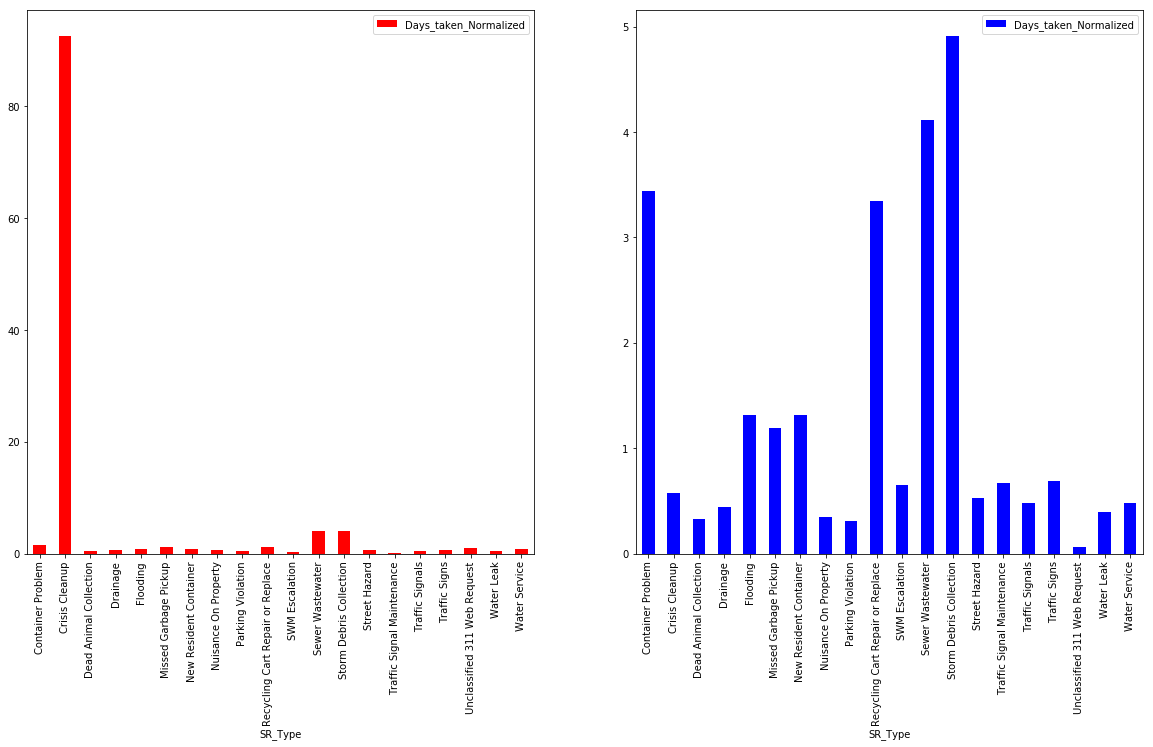

In [45]:
fig = pl.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
before_overdue_mean.plot(kind='bar',color='r',ax=ax1)
ax2 = fig.add_subplot(122)
after_overdue_mean.plot(kind='bar',color='b',ax=ax2)

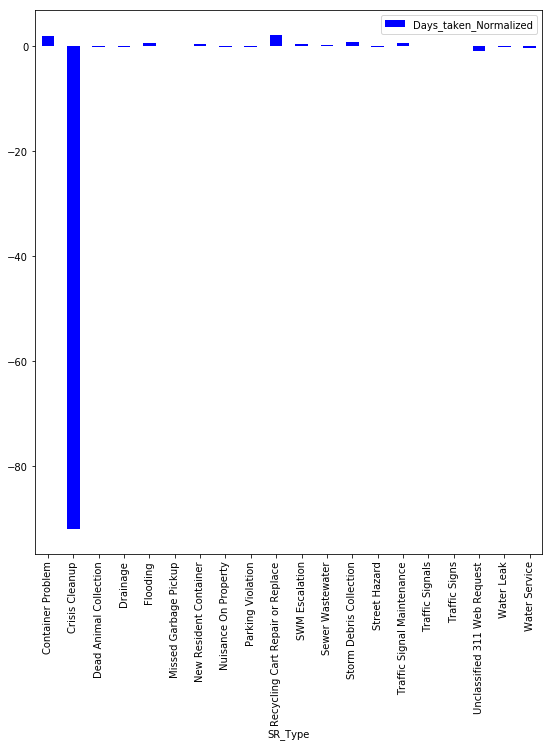

In [46]:
fig = pl.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
(after_overdue_mean - before_overdue_mean).plot(kind='bar',color='b',ax=ax1)

## Without Crisis Cleanup Mean time of request completion

In [47]:
#Removing Crisis cleanup to get a better view 
top_20_wo_Crisis = ['Storm Debris Collection',
       'Missed Garbage Pickup',
       'Container Problem',
       'Traffic Signal Maintenance',
       'Water Leak',
       'Flooding',
       'Sewer Wastewater',
       'Street Hazard',
       'Nuisance On Property',
       'Drainage',
       'Water Service',
       'Traffic Signs',
       'Unclassified 311 Web Request',
       'Recycling Cart Repair or Replace',
       'Parking Violation',
       'Traffic Signals',
       'Dead Animal Collection',
       'SWM Escalation',
       'New Resident Container']

In [48]:
# before harvey
before_overdue_mean_wo_Crisis = harvey_compiled_sub.loc[harvey_compiled_sub['SR_Type']\
                .isin(top_20_wo_Crisis)][['SR_Type','Days_taken_Normalized']]\
                    .groupby(['SR_Type']).mean()

In [49]:
# after harvey
after_overdue_mean_wo_Crisis = harvey_sub.loc[harvey_sub['SR_Type']\
                .isin(top_20_wo_Crisis)][['SR_Type','Days_taken_Normalized']]\
                                    .groupby(['SR_Type']).mean()

(0, 5)

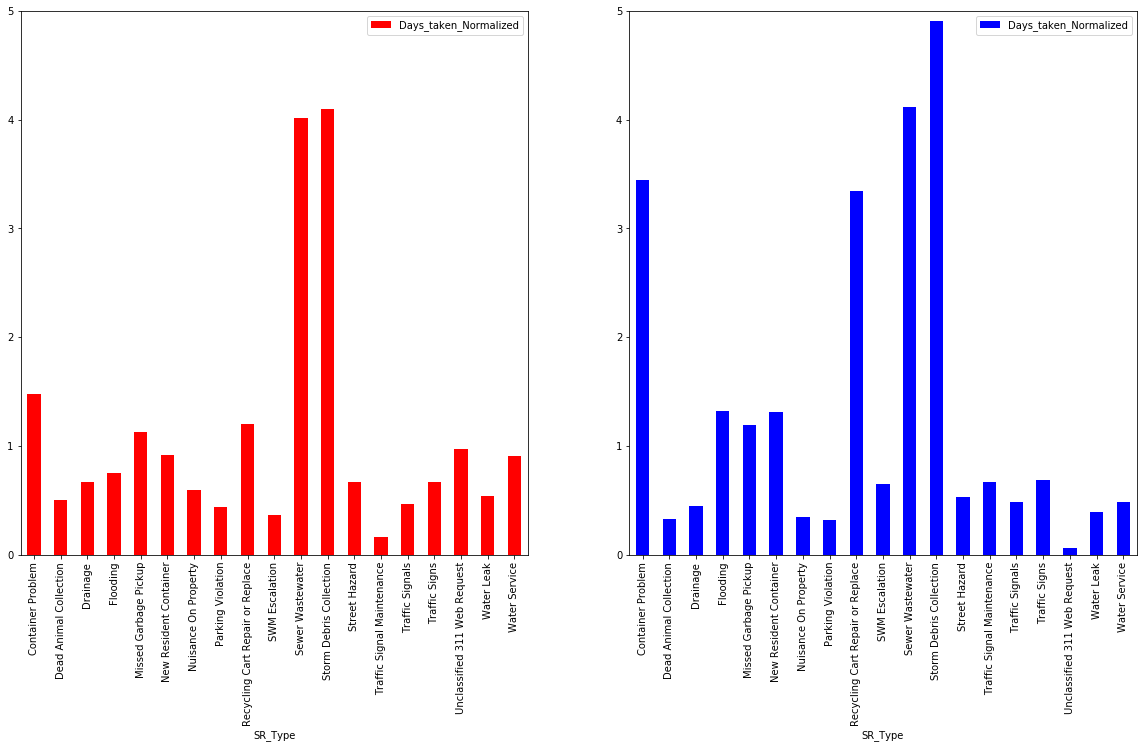

In [50]:
fig = pl.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
before_overdue_mean_wo_Crisis.plot(kind='bar',color='r',ax=ax1)
ax1.set_ylim(0,5)
ax2 = fig.add_subplot(122)
after_overdue_mean_wo_Crisis.plot(kind='bar',color='b',ax=ax2)
ax2.set_ylim(0,5)

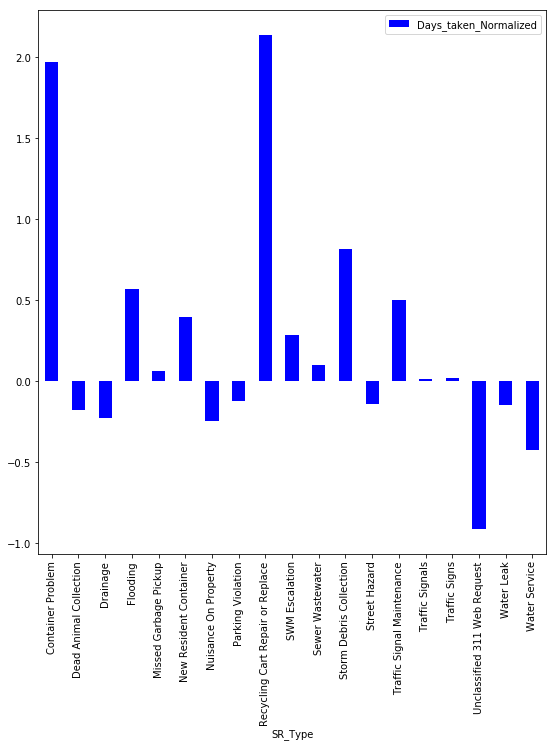

In [51]:
fig = pl.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
(after_overdue_mean_wo_Crisis - before_overdue_mean_wo_Crisis).plot(kind='bar',color='b',ax=ax1)

In [52]:
type([np.arange(0,2)])

list

In [53]:
min(harvey_sub.Service_Request_Creation_Date)

datetime.date(2017, 8, 23)

In [54]:
before_harvey_subset = harvey_compiled_sub.loc[harvey_compiled_sub.Service_Request_Creation_Date \
                                               < datetime.date(2017, 8, 23)]

In [55]:
after_harvey_subset = harvey_compiled_sub.loc[harvey_compiled_sub.Service_Request_Creation_Date \
                                               >= datetime.date(2017, 8, 23)]

## Without Crisis cleanup frequency of requests

In [56]:
max(before_harvey_subset.Service_Request_Creation_Date) - min(before_harvey_subset.Service_Request_Creation_Date)

datetime.timedelta(1329)

In [57]:
# before harvey frequency per day
before_overdue_freq_wo_Crisis = (before_harvey_subset.loc[before_harvey_subset['SR_Type']\
                .isin(top_20_wo_Crisis)][['SR_Type','Days_taken_Normalized']].groupby('SR_Type').count()) / 333

In [58]:
max(harvey_sub.Service_Request_Creation_Date) - min(harvey_sub.Service_Request_Creation_Date)

datetime.timedelta(63)

In [59]:
# after harvey frequency per day
after_overdue_freq_wo_Crisis = (harvey_sub.loc[harvey_sub['SR_Type']\
                .isin(top_20_wo_Crisis)][['SR_Type','Days_taken_Normalized']].groupby('SR_Type').count()) / 63

In [138]:
max(after_harvey_subset.Service_Request_Creation_Date) - min(after_harvey_subset.Service_Request_Creation_Date)

datetime.timedelta(465)

In [139]:
# after harvey frequency per day
after_overdue_freq_wo_Crisis_test = (after_harvey_subset.loc[after_harvey_subset['SR_Type']\
                .isin(top_20_wo_Crisis)][['SR_Type','Days_taken_Normalized']].groupby('SR_Type').count()) / 465

(0, 300)

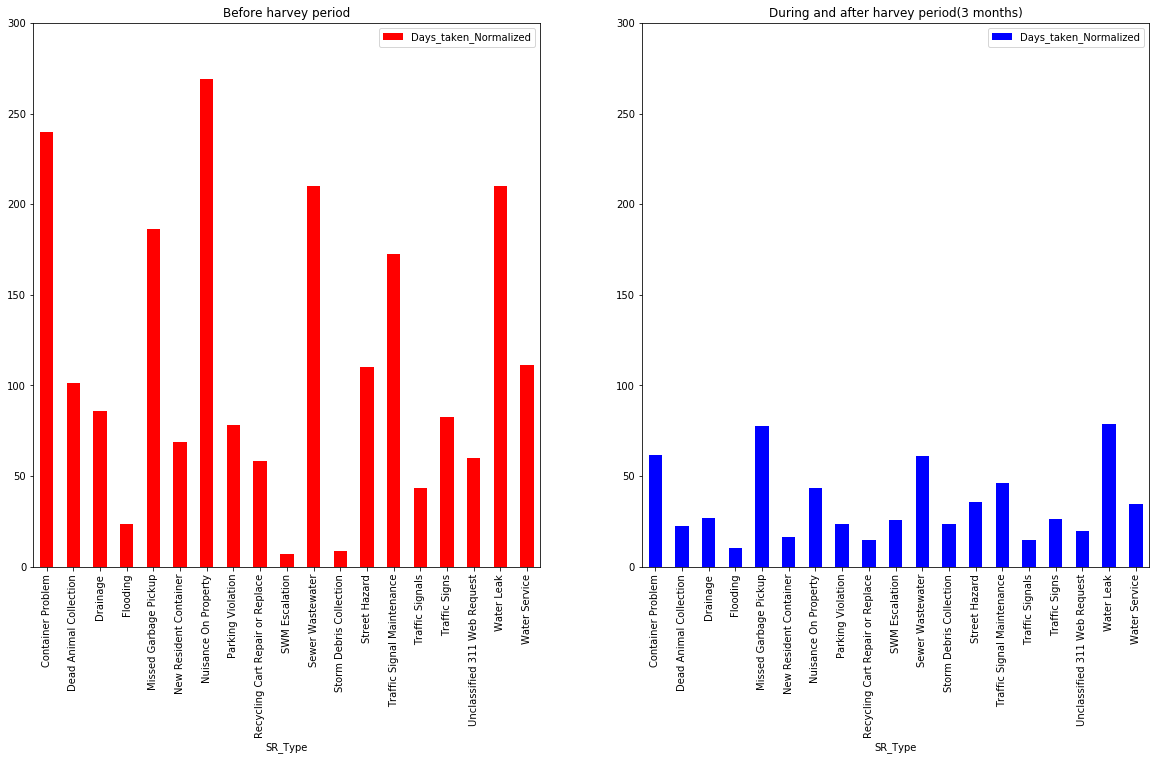

In [141]:
fig = pl.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
ax1.set_ylim(0,300)
before_overdue_freq_wo_Crisis.plot(kind='bar',color='r',ax=ax1,label='Frequency of requests before harvey')
ax1.set_title('Before harvey period')
ax2 = fig.add_subplot(122)
after_overdue_freq_wo_Crisis_test.plot(kind='bar',color='b',ax=ax2,label='Frequency of requests in 3 months after harvey')
ax2.set_title('During and after harvey period(3 months)')
ax2.set_ylim(0,300)

(0, 300)

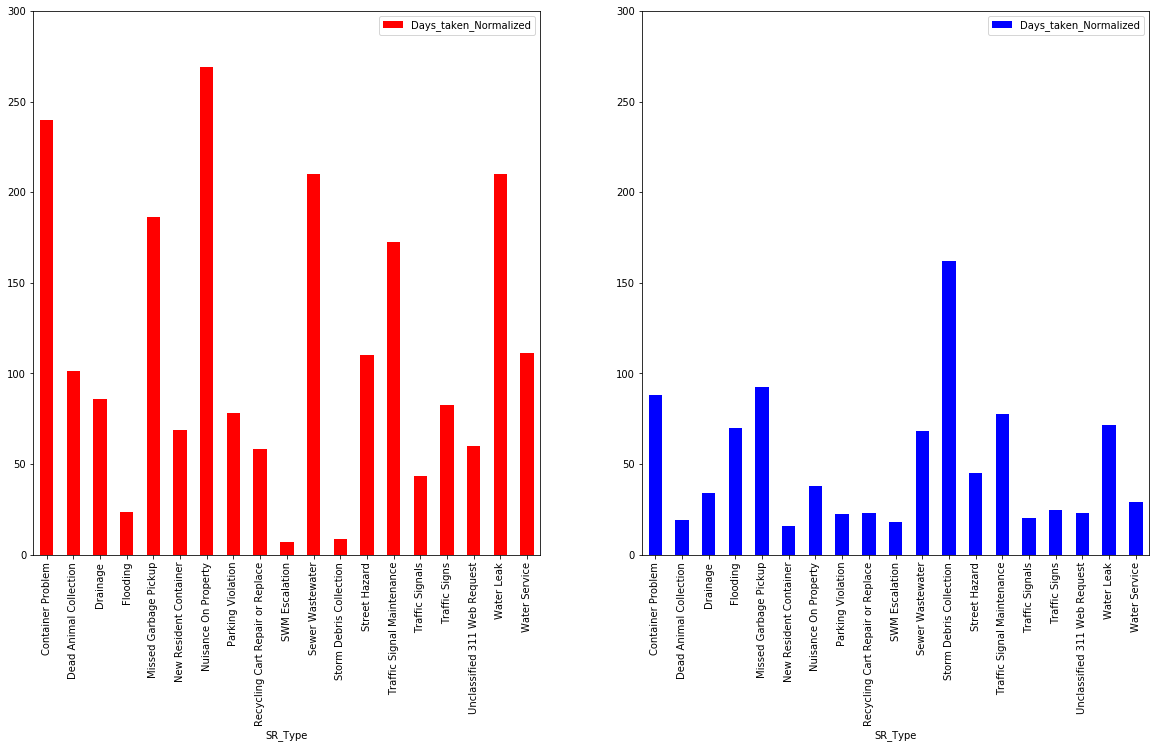

In [60]:
fig = pl.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
ax1.set_ylim(0,300)
before_overdue_freq_wo_Crisis.plot(kind='bar',color='r',ax=ax1,label='Frequency of requests before harvey')
ax1.set_title('Before harvey period')
ax2 = fig.add_subplot(122)
after_overdue_freq_wo_Crisis.plot(kind='bar',color='b',ax=ax2,label='Frequency of requests in 3 months after harvey')
ax1.set_title('During and after harvey period(3 months)')
ax2.set_ylim(0,300)

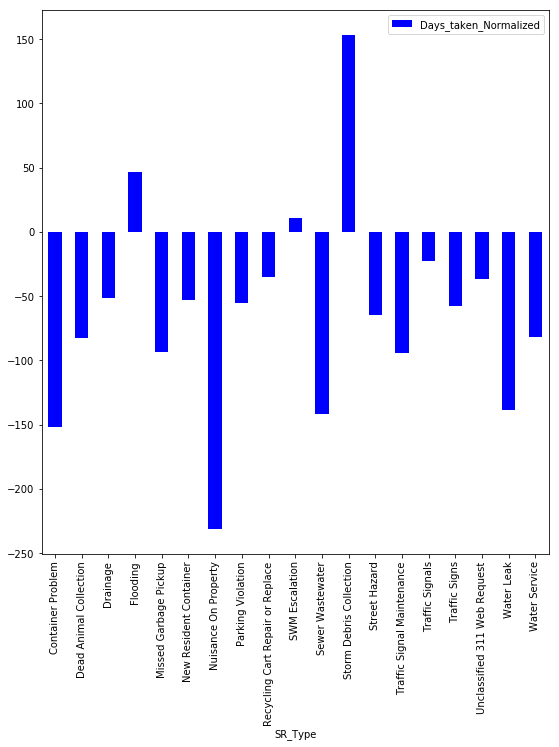

In [61]:
fig = pl.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
(after_overdue_freq_wo_Crisis - before_overdue_freq_wo_Crisis).plot(kind='bar',color='b',ax=ax1)

In [62]:
harvey_compiled_sub.columns

Index(['Case_Number', 'SR_Type', 'Service_Level_Agreement_Days',
       'Service_Request_Creation_Date', 'Due_Date', 'Date_Closed', 'Overdue',
       'Days_taken_Normalized'],
      dtype='object')

In [63]:
harvey_compiled_sub.sort_values(by = 'Service_Request_Creation_Date',inplace=True)

In [64]:
harvey_Time_Taken_avg = harvey_compiled_sub.groupby(['Service_Request_Creation_Date','SR_Type'],as_index=False)\
                    [['Service_Request_Creation_Date','SR_Type','Days_taken_Normalized']].mean()

In [65]:
harvey_Time_Taken_avg.head()

,Service_Request_Creation_Date,SR_Type,Days_taken_Normalized
0,2014-01-01,Add A Bin,0.222222
1,2014-01-01,Add A Can,0.428571
2,2014-01-01,Building Code or Permit Violation,0.619048
3,2014-01-01,Cave In Street,0.000000
4,2014-01-01,Clean Off Road Ditch,0.011111


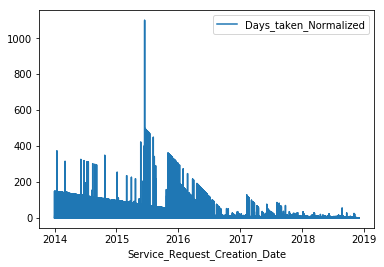

In [66]:
harvey_Time_Taken_avg.plot.line(x='Service_Request_Creation_Date',y='Days_taken_Normalized')

In [67]:
harvey_compiled_sub.columns

Index(['Case_Number', 'SR_Type', 'Service_Level_Agreement_Days',
       'Service_Request_Creation_Date', 'Due_Date', 'Date_Closed', 'Overdue',
       'Days_taken_Normalized'],
      dtype='object')

In [68]:
harvey_compiled_sub.sort_values(by = 'Service_Request_Creation_Date',inplace=True)

In [69]:
harvey_Time_Taken_freq = harvey_compiled_sub.groupby(['Service_Request_Creation_Date'],as_index=False)\
                    [['Case_Number']].count()

In [70]:
harvey_Time_Taken_freq.head()

,Service_Request_Creation_Date,Case_Number
0,2014-01-01,297
1,2014-01-02,1102
2,2014-01-03,1008
3,2014-01-04,445
4,2014-01-05,265


Text(0.5,1,'Frequency of requests daily')

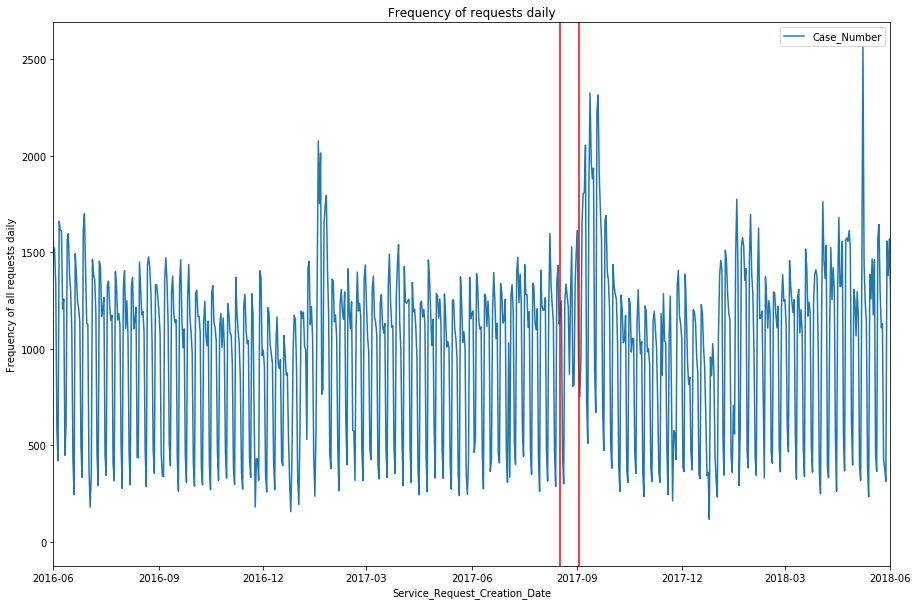

In [71]:
harvey_Time_Taken_freq.plot.line(x='Service_Request_Creation_Date',y='Case_Number',figsize=(15,10))
plt.axvline('2017-08-17',c='r')
plt.axvline('2017-09-02',c='r')
plt.xlim('2016-06','2018-06')
plt.ylabel('Frequency of all requests daily')
plt.title('Frequency of requests daily')

In [72]:
harvey_Time_Taken_freq.Case_Number = harvey_Time_Taken_freq.Case_Number.rolling(9,center=True,axis=0).mean()

Text(0.5,1,'Frequency of requests daily after smoothing')

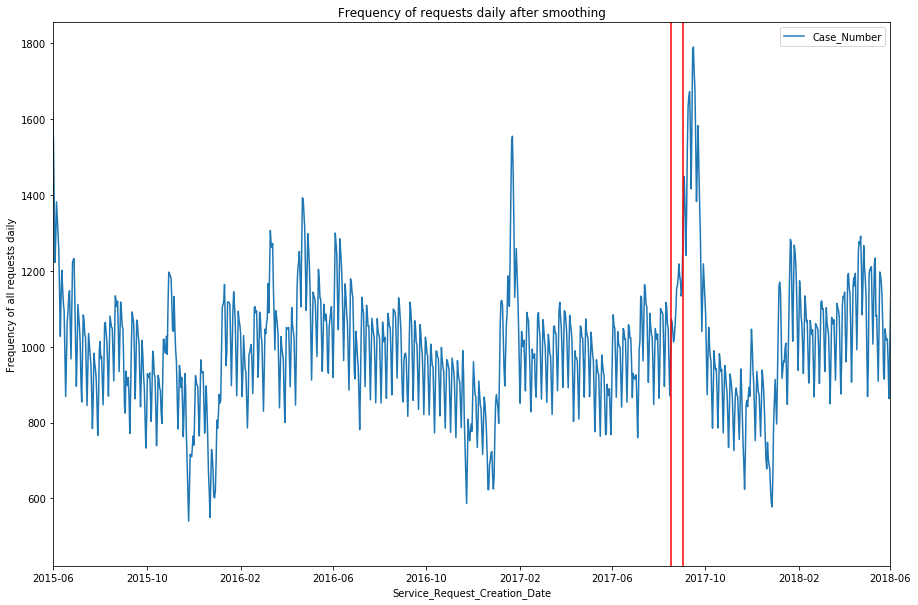

In [73]:
harvey_Time_Taken_freq.plot.line(x='Service_Request_Creation_Date',y='Case_Number',figsize=(15,10))
plt.axvline('2017-08-17',c='r')
plt.axvline('2017-09-02',c='r')
plt.xlim('2015-06','2018-06')
plt.ylabel('Frequency of all requests daily')
plt.title('Frequency of requests daily after smoothing')

In [74]:
def changeFinder(data):

    n = len(data)
    datamean = data.mean()
    datasqmean = (data**2).mean()
    fac = datasqmean - datamean**2
    
    datacsum = data.cumsum()
    datasum = datacsum[-1]

    ppoc = np.zeros(n) #container for point of change relative prob

    #online (iterative) search for point of change
    for m in range(n-1):
        pos = m + 1
        relativePosition = (pos) * (n - pos)
 
        Q = datacsum[m] - (datasum - datacsum[m]) #cumsum up to m - cumsum after
        
        U = -(datamean * (n - 2 * pos) + Q)**2 / (4.0 * relativePosition) + fac
       
        ppoc[m+1] = (-(n * 0.5 - 1) * np.log(n * U * 0.5) - 
                 0.5 * np.log(relativePosition))

    ppoc[0] = min(ppoc[1:])
    changePoint = np.argmax(ppoc)
    
    return {'pChange': ppoc, 
            'pointOfChange': changePoint + 1,
            'meanBefore': (data[:changePoint+1]).mean(), 
            'meanAfter': (data[(changePoint+1):]).mean()}

In [75]:
harvey_Time_Taken_freq.dropna(inplace=True)
harvey_Time_Taken_freq.reset_index(inplace=True,drop=True)

In [76]:
harvey_Time_Taken_freq_sub = harvey_Time_Taken_freq[harvey_Time_Taken_freq.Service_Request_Creation_Date > datetime.date(2015,1,1)] 

In [77]:
timeseries = harvey_Time_Taken_freq_sub.Case_Number.values
dates= harvey_Time_Taken_freq_sub.Service_Request_Creation_Date
pochange = changeFinder(timeseries)
pochange

{'pChange': array([-11928.7576889 , -11926.43271564, -11926.00885845, ...,
        -11927.13767615, -11927.18149497, -11926.94553624]),
 'pointOfChange': 1114,
 'meanBefore': 976.2793736285657,
 'meanAfter': 1097.201923076923}

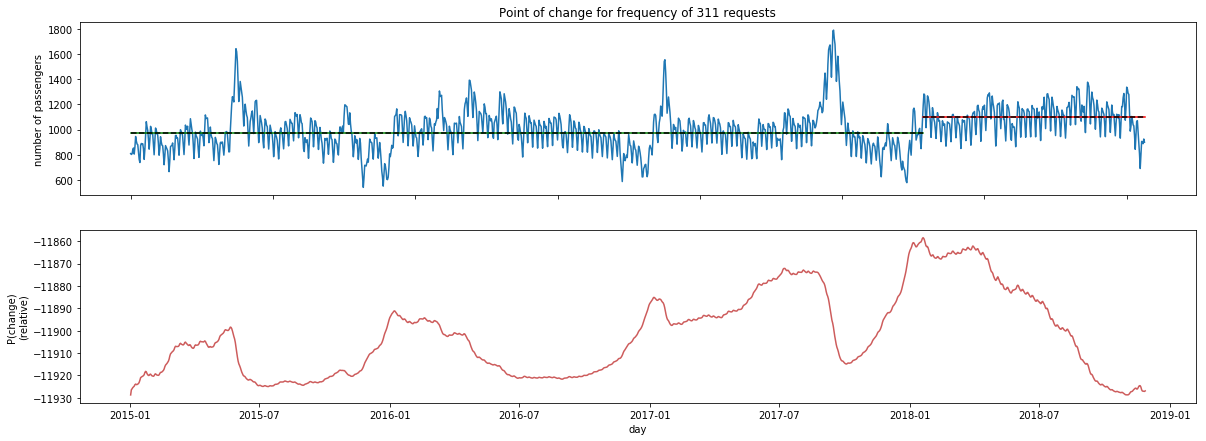

In [78]:
fig = pl.figure(figsize=(20,7))
ax1 = pl.subplot(211)
ax1.plot(range(len(timeseries)), timeseries)
#ax1.plot([0,100], [0,0], '-')
#ax1.plot([100,200], [3,3], '-')

ax1.plot([0,pochange['pointOfChange']], 
         [pochange['meanBefore'], pochange['meanBefore']], 'g-')
ax1.plot([pochange['pointOfChange'],len(timeseries)], 
         [pochange['meanAfter'], pochange['meanAfter']], 'r-')
ax1.plot([0,pochange['pointOfChange']], 
         [pochange['meanBefore'], pochange['meanBefore']], 'k--')
ax1.plot([pochange['pointOfChange'],len(timeseries)], 
         [pochange['meanAfter'], pochange['meanAfter']], 'k--')
ax1.set_xticklabels(ax1.get_xticklabels(), visible=False)
ax1.set_ylabel("number of passengers")

ax1.set_title("Point of change for frequency of 311 requests")

ax2 = pl.subplot(212)
ax2.plot(dates, 
        pochange['pChange'], color="IndianRed")
ax2.set_ylabel("P(change)\n(relative)")
#ax2.set_xticklabels(dates, visible=True)
ax2.set_xlabel("day");
pl.savefig('point_of_change.png')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """Entry point for launching an IPython kernel.


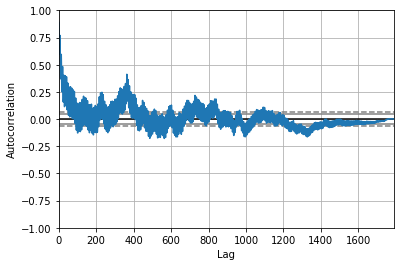

In [79]:
autocorrelation_plot(harvey_Time_Taken_freq.Case_Number)

In [80]:
harvey_acr_freq = harvey_Time_Taken_freq[['Case_Number','Service_Request_Creation_Date']]

In [81]:
harvey_acr_freq.index = harvey_acr_freq.Service_Request_Creation_Date

In [82]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

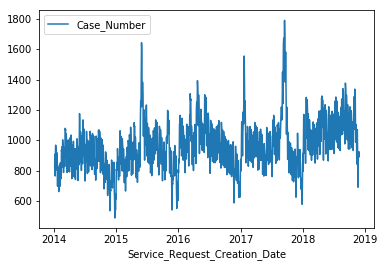

In [83]:
harvey_acr_freq.plot()

In [84]:
harvey_acr_freq.head()

,Case_Number,Service_Request_Creation_Date
Service_Request_Creation_Date,,
2014-01-05,822.888889,2014-01-05
2014-01-06,906.888889,2014-01-06
2014-01-07,843.222222,2014-01-07
2014-01-08,764.111111,2014-01-08
2014-01-09,855.333333,2014-01-09


In [85]:
harvey_acr_freq.drop('Service_Request_Creation_Date',axis=1,inplace=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """Entry point for launching an IPython kernel.


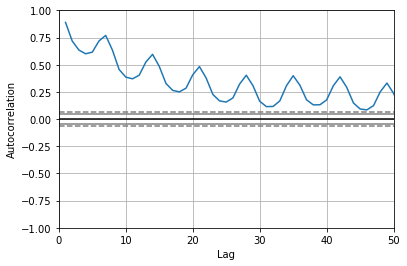

<Figure size 432x288 with 0 Axes>

In [143]:
autocorrelation_plot(harvey_acr_freq)
plt.xlim(0,50)
pyplot.show()
plt.savefig('ACR.jpg')

In [87]:
test_dates = harvey_acr_freq.loc[datetime.date(2017,8,16):datetime.date(2018,3,1)].Case_Number.keys()

In [162]:
train,test = harvey_acr_freq[harvey_acr_freq.index < datetime.date(2017,8,16)].Case_Number.values,\
                            harvey_acr_freq.loc[datetime.date(2017,8,16):datetime.date(2018,3,1)].Case_Number.values

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  500
Model:                     ARMA(8, 0)   Log Likelihood               -2391.048
Method:                       css-mle   S.D. of innovations             28.588
Date:                Mon, 17 Dec 2018   AIC                           4802.096
Time:                        13:14:12   BIC                           4844.242
Sample:                             0   HQIC                          4818.634
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        886.2182     12.509     70.844      0.000     861.700     910.736
ar.L1.y        1.1920      0.037     32.357      0.000       1.120       1.264
ar.L2.y       -0.4842      0.063     -7.703      0.0

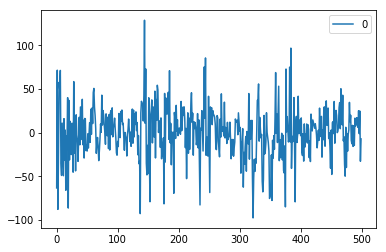

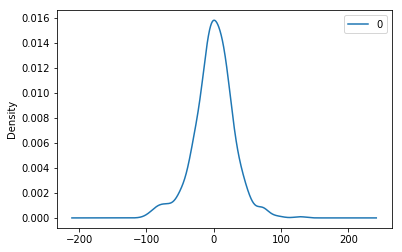

                0
count  500.000000
mean     0.132301
std     29.332212
min    -97.615609
25%    -14.606316
50%      0.493054
75%     16.820871
max    128.549764


In [163]:
model = ARIMA(train[:500], order=(8,0,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [90]:
harvey_acr_freq.head()

,Case_Number
Service_Request_Creation_Date,
2014-01-05,822.888889
2014-01-06,906.888889
2014-01-07,843.222222
2014-01-08,764.111111
2014-01-09,855.333333


In [91]:
harvey_acr_freq[harvey_acr_freq.index < datetime.date(2017,8,16)].Case_Number.values

array([ 822.88888889,  906.88888889,  843.22222222, ..., 1058.44444444,
       1049.33333333,  963.77777778])

In [165]:
history = [x for x in train[:500]]
predictions = list()
for t in range(len(test[:150])):
    model = ARIMA(history, order=(8,0,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(yhat)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test[:100], predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

predicted=828.426355, expected=870.444444
predicted=828.426355, expected=956.777778
predicted=828.426355, expected=1073.222222
predicted=828.426355, expected=1065.777778
predicted=828.426355, expected=1041.666667
predicted=828.426355, expected=1012.777778
predicted=828.426355, expected=1025.000000
predicted=828.426355, expected=1056.000000
predicted=828.426355, expected=1094.888889
predicted=828.426355, expected=1152.000000
predicted=828.426355, expected=1161.777778
predicted=828.426355, expected=1181.000000
predicted=828.426355, expected=1218.444444
predicted=828.426355, expected=1186.555556
predicted=828.426355, expected=1173.444444
predicted=828.426355, expected=1133.666667
predicted=828.426355, expected=1147.555556
predicted=828.426355, expected=1258.666667
predicted=828.426355, expected=1369.111111
predicted=828.426355, expected=1449.111111
predicted=828.426355, expected=1363.111111
predicted=828.426355, expected=1240.666667
predicted=828.426355, expected=1341.777778
predicted=828

ValueError: Found input variables with inconsistent numbers of samples: [100, 150]

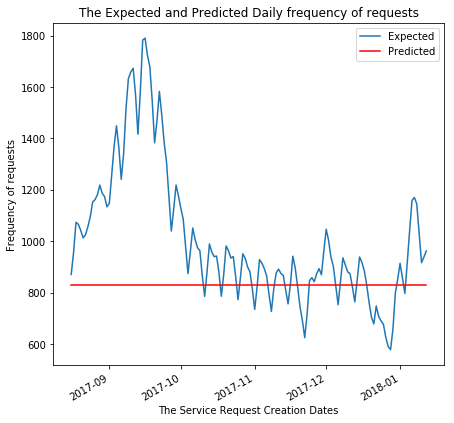

In [172]:
fig,ax = plt.subplots(figsize=(7,7))
ax.plot(test_dates[:150],test[:150],label='Expected')
ax.plot(test_dates[:150],predictions, color='red',label='Predicted')
plt.legend(loc='upper right')
ax.xaxis_date()     
fig.autofmt_xdate()
plt.xlabel('The Service Request Creation Dates')
plt.ylabel('Frequency of requests')
plt.title('The Expected and Predicted Daily frequency of requests')
plt.savefig('Frequency.png')

In [173]:
predictions_test = np.array(predictions).flatten()

No handles with labels found to put in legend.


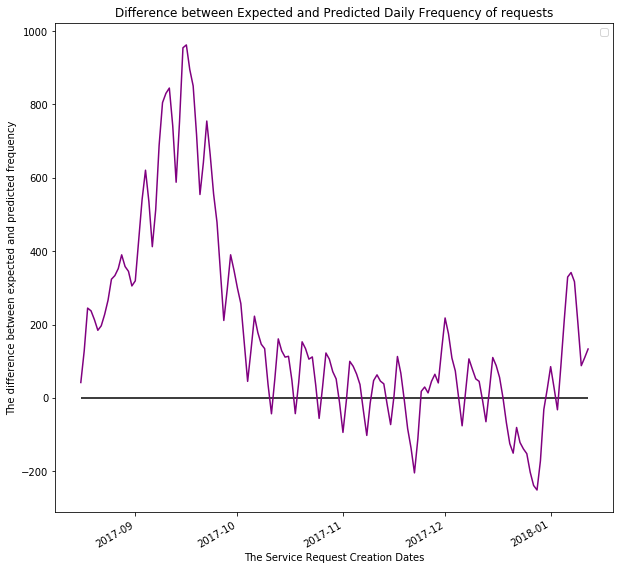

In [177]:
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(test_dates[:150],test[:150] - predictions_test,label='',color='purple')
plt.hlines(0,test_dates[0],test_dates[149],color='k')
plt.title('Difference between Expected and Predicted Daily Frequency of requests')
plt.legend(loc='upper right')
plt.xlabel('The Service Request Creation Dates')
plt.ylabel('The difference between expected and predicted frequency')
ax.xaxis_date()     
fig.autofmt_xdate()
plt.savefig('Diff_Frequency.png')

predicted=866.874681, expected=870.444444
predicted=894.424305, expected=956.777778
predicted=912.730424, expected=1073.222222
predicted=904.172438, expected=1065.777778
predicted=890.032758, expected=1041.666667
predicted=887.529207, expected=1012.777778
predicted=892.584755, expected=1025.000000
predicted=894.858467, expected=1056.000000
predicted=892.348966, expected=1094.888889
predicted=889.493915, expected=1152.000000
predicted=889.025958, expected=1161.777778
predicted=889.752927, expected=1181.000000
predicted=889.812117, expected=1218.444444
predicted=889.068439, expected=1186.555556
predicted=888.404270, expected=1173.444444
predicted=888.225575, expected=1133.666667
predicted=888.236578, expected=1147.555556
predicted=888.110990, expected=1258.666667
predicted=887.866843, expected=1369.111111
predicted=887.671743, expected=1449.111111
predicted=887.578814, expected=1363.111111
predicted=887.519756, expected=1240.666667
predicted=887.439236, expected=1341.777778
predicted=887

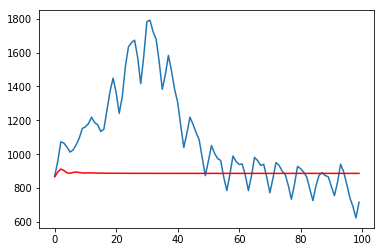

In [94]:
history = [x for x in train[:500]]
predictions = list()
for t in range(len(test[:100])):
    model = ARIMA(history, order=(3,0,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(yhat)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test[:100], predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test[:100])
pyplot.plot(predictions, color='red')
pyplot.show()

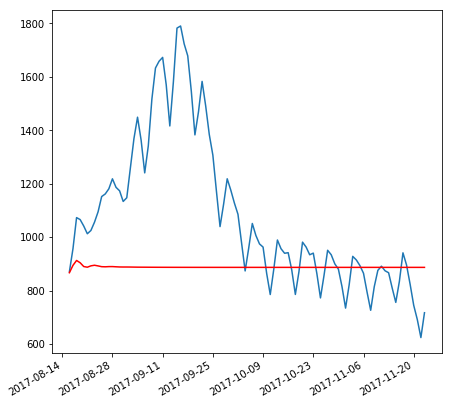

In [95]:
fig,ax = plt.subplots(figsize=(7,7))
pyplot.plot(test_dates[:100],test[:100])
pyplot.plot(test_dates[:100],predictions, color='red')
ax.xaxis_date()     
fig.autofmt_xdate()

In [96]:
predictions = np.array(predictions[:100]).flatten()

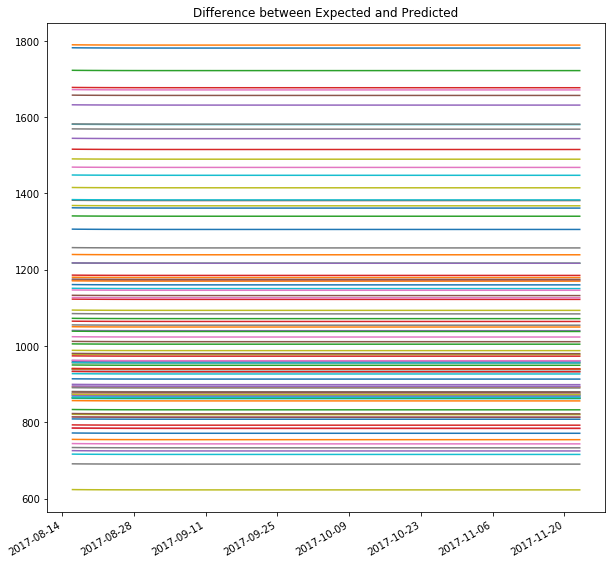

In [160]:
fig,ax = plt.subplots(figsize=(10,10))
plt.plot(test_dates[:100],test[:100] - predictions)
plt.title('Difference between Expected and Predicted')
ax.xaxis_date()     
fig.autofmt_xdate()

In [98]:
# history = [x for x in train[:500]]
# predictions = list()
# for t in range(len(test[:100])):
#     model = ARIMA(history, order=(10,1,4))
#     model_fit = model.fit(disp=0)
#     output = model_fit.forecast()
#     yhat = output[0]
#     predictions.append(yhat)
#     obs = test[t]
#     history.append(yhat)
#     print('predicted=%f, expected=%f' % (yhat, obs))
# error = mean_squared_error(test[:100], predictions)
# print('Test MSE: %.3f' % error)
# # plot
# pyplot.plot(test)
# pyplot.plot(predictions, color='red')
# pyplot.show()

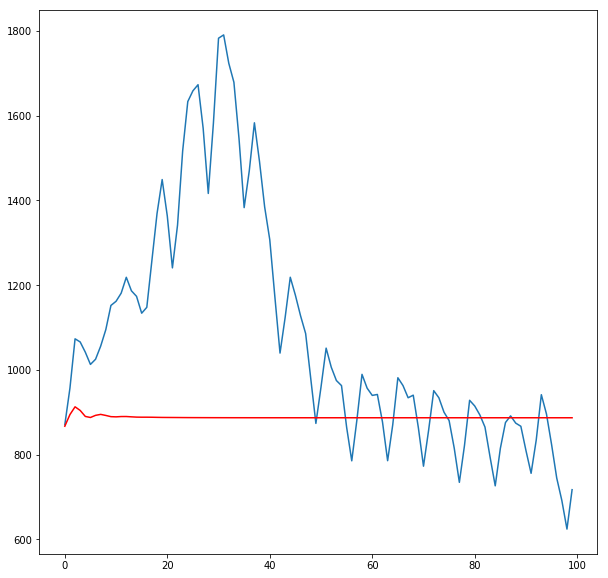

In [99]:
ax,fig = plt.subplots(figsize=(10,10))
pyplot.plot(test[:100])
pyplot.plot(predictions, color='red')

In [100]:
len(train)

1319

In [101]:
# history = [x for x in train[len(train)-500:]]
# predictions_10_1_2 = list()
# for t in range(len(test[:100])):
#     model = ARIMA(history, order=(10,1,4))
#     model_fit = model.fit(disp=0)
#     output = model_fit.forecast()
#     yhat = output[0]
#     predictions_10_1_2.append(yhat)
#     obs = test[t]
#     history.append(obs)
#     print('predicted=%f, expected=%f' % (yhat, obs))
# error = mean_squared_error(test[:100], predictions)
# print('Test MSE: %.3f' % error)
# # plot
# pyplot.plot(test)
# pyplot.plot(predictions_10_1_2, color='red')
# pyplot.show()

In [102]:
# shape(predictions_3_0_0)

NameError: name 'predictions_3_0_0' is not defined

predicted=866.874681, expected=870.444444
predicted=898.907794, expected=956.777778
predicted=988.010394, expected=1073.222222
predicted=1054.742577, expected=1065.777778
predicted=984.454384, expected=1041.666667
predicted=1012.085024, expected=1012.777778
predicted=992.920484, expected=1025.000000
predicted=1022.429090, expected=1056.000000
predicted=1038.611138, expected=1094.888889
predicted=1067.104190, expected=1152.000000
predicted=1120.707502, expected=1161.777778
predicted=1102.233484, expected=1181.000000
predicted=1144.808396, expected=1218.444444
predicted=1181.733715, expected=1186.555556
predicted=1117.919510, expected=1173.444444
predicted=1146.231060, expected=1133.666667
predicted=1092.238307, expected=1147.555556
predicted=1138.799204, expected=1258.666667
predicted=1252.926450, expected=1369.111111
predicted=1308.486828, expected=1449.111111
predicted=1372.602467, expected=1363.111111
predicted=1242.098008, expected=1240.666667
predicted=1194.581128, expected=1341.77

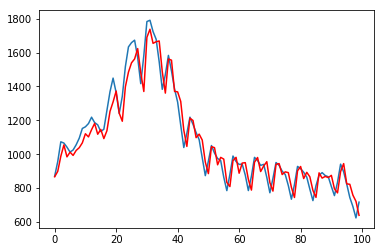

In [103]:
history = [x for x in train[:500]]
predictions_3_0_0 = list()
for t in range(len(test[:100])):
    model = ARIMA(history, order=(3,0,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions_3_0_0.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test[:100], predictions_3_0_0)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test[:100])
pyplot.plot(predictions_3_0_0, color='red')
pyplot.show()

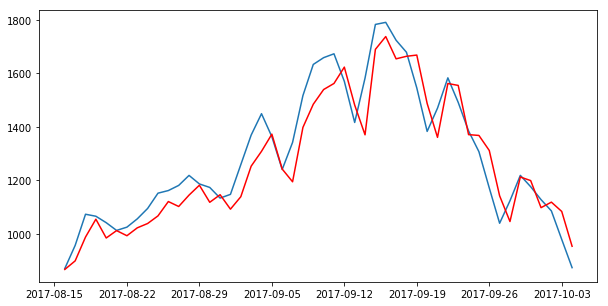

In [104]:
fig, ax = plt.subplots(figsize=(10,5))
pyplot.plot(test_dates[:50],test[:50])
pyplot.plot(test_dates[:50],predictions_3_0_0[:50], color='red')
pyplot.show()
ax.xaxis_date()     
fig.autofmt_xdate()

In [105]:
test[:100]

array([ 870.44444444,  956.77777778, 1073.22222222, 1065.77777778,
       1041.66666667, 1012.77777778, 1025.        , 1056.        ,
       1094.88888889, 1152.        , 1161.77777778, 1181.        ,
       1218.44444444, 1186.55555556, 1173.44444444, 1133.66666667,
       1147.55555556, 1258.66666667, 1369.11111111, 1449.11111111,
       1363.11111111, 1240.66666667, 1341.77777778, 1516.77777778,
       1633.22222222, 1658.55555556, 1673.        , 1570.11111111,
       1416.33333333, 1582.22222222, 1782.77777778, 1790.55555556,
       1723.66666667, 1678.77777778, 1545.33333333, 1382.88888889,
       1469.77777778, 1583.11111111, 1491.33333333, 1384.55555556,
       1307.11111111, 1171.55555556, 1039.55555556, 1123.66666667,
       1218.55555556, 1176.11111111, 1127.88888889, 1085.66666667,
        979.11111111,  873.55555556,  959.44444444, 1051.22222222,
       1006.22222222,  974.77777778,  962.77777778,  864.44444444,
        785.22222222,  881.44444444,  989.33333333,  956.77777

In [106]:
predictions_3_0_0 = np.array(predictions_3_0_0[:100]).flatten()

In [107]:
test[:100] - predictions_3_0_0

array([   3.56976369,   57.86998391,   85.21182846,   11.03520081,
         57.21228234,    0.69275412,   32.07951598,   33.57091009,
         56.27775064,   84.89581009,   41.07027554,   78.76651554,
         73.63604865,    4.8218403 ,   55.52493437,  -12.56439367,
         55.31724821,  119.86746312,  116.18466071,  140.62428358,
         -9.49135586,   -1.43134126,  147.19664988,  118.96991201,
        148.80687925,  119.12273485,  110.88957189,  -53.13364678,
        -65.0104622 ,  212.06200689,   93.19081698,   53.0615552 ,
         69.49819852,   15.10984552, -122.95042791, -104.49650921,
        109.17325929,   21.13964953,  -63.51147475,   13.72007727,
        -60.6995562 , -140.08517611, -102.64850925,   77.67501456,
          6.10882666,  -22.9218943 ,   30.07032198,  -32.79200855,
       -104.54164392,  -79.9499098 ,   73.82727519,    6.65775033,
        -32.43723514,   37.21957924,  -18.57142546, -106.72257454,
        -48.45453227,   72.26376631,   27.29695195,  -24.76688

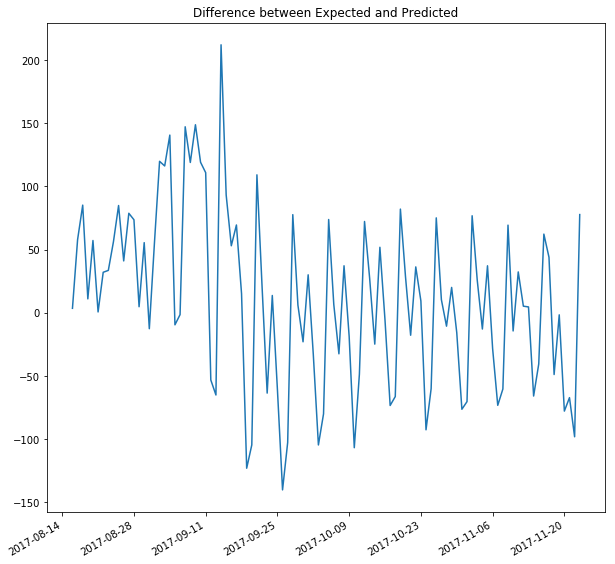

In [110]:
fig,ax = plt.subplots(figsize=(10,10))
plt.plot(test_dates[:100],test[:100] - predictions_3_0_0)
plt.title('Difference between Expected and Predicted')
ax.xaxis_date()     
fig.autofmt_xdate()

In [112]:
# ax,fig = plt.subplots(figsize=(10,10))
# plt.plot(test)
# plt.plot(predictions_15_1_0, color='red')
# plt.show()

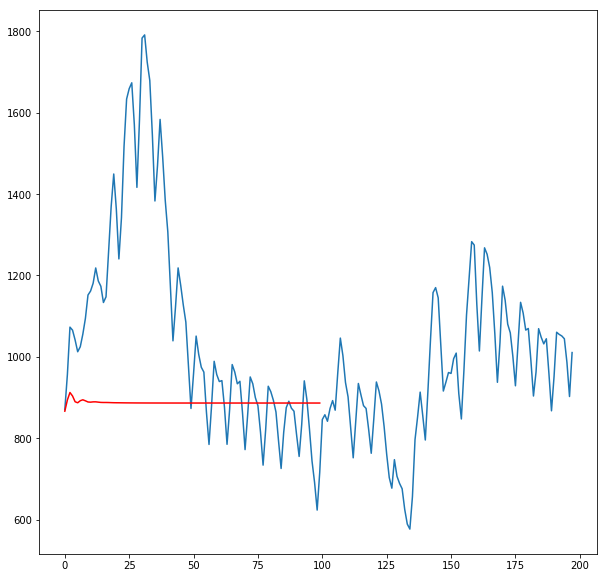

In [113]:
ax,fig = plt.subplots(figsize=(10,10))
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

### Run the ARIMA model on 'before harvey' dataframe and predict values for the future i.e. after harvey. Compare after that the difference in days taken and frequency

## Presentation Flow:
### Problem statement, Method to tackle it, Data description and dealing with bad data, Approaches used, Synopsis(bring it all together)

In [116]:
harvey_compiled_sub.columns

Index(['Case_Number', 'SR_Type', 'Service_Level_Agreement_Days',
       'Service_Request_Creation_Date', 'Due_Date', 'Date_Closed', 'Overdue',
       'Days_taken_Normalized'],
      dtype='object')

In [118]:
harvey_Time_Taken_avg = harvey_compiled_sub.groupby('Service_Request_Creation_Date',as_index=False)\
                    [['Days_taken_Normalized']].mean()

In [119]:
harvey_Time_Taken_avg.dtypes

Service_Request_Creation_Date     object
Days_taken_Normalized            float64
dtype: object

In [120]:
harvey_Time_Taken_avg.Service_Request_Creation_Date = \
                        pd.to_datetime(harvey_Time_Taken_avg.Service_Request_Creation_Date)

In [121]:
min(harvey_Time_Taken_avg.Service_Request_Creation_Date)

Timestamp('2014-01-01 00:00:00')

In [122]:
before_harvey_subset.head()

,Case_Number,SR_Type,Service_Level_Agreement_Days,Service_Request_Creation_Date,Due_Date,Date_Closed,Overdue,Days_taken_Normalized
0,0-101001233975,Nuisance On Property,180.0,2014-01-01,2014-09-10,2014-02-28,-193.81,0.322222
1,24705-101001233976,Unclassified 311 Web Request,1.0,2014-01-01,2014-01-04,2014-01-01,-2.76,0.000000
2,101001233977,New Resident Container,12.0,2014-01-01,2014-01-08,2014-01-03,-4.32,0.166667
3,101001233978,New Resident Container,12.0,2014-01-01,2014-01-08,2014-01-03,-4.32,0.166667
4,101001233979,Recycling Participation NEW,24.0,2014-01-01,2014-01-23,2014-01-09,-14.00,0.333333


In [123]:
harvey_Time_Taken_avg = before_harvey_subset.groupby(['Service_Request_Creation_Date'])\
                    [['Days_taken_Normalized']].mean()
after_harvey_Time_Taken_avg = after_harvey_subset.groupby(['Service_Request_Creation_Date'])\
                    [['Days_taken_Normalized']].mean()

In [124]:
np.array(harvey_Time_Taken_avg.index)

array([datetime.date(2014, 1, 1), datetime.date(2014, 1, 2),
       datetime.date(2014, 1, 3), ..., datetime.date(2017, 8, 20),
       datetime.date(2017, 8, 21), datetime.date(2017, 8, 22)],
      dtype=object)

In [125]:
train_avg,test_avg = harvey_Time_Taken_avg[np.array(harvey_Time_Taken_avg.index) < \
                                           datetime.date(2017,8,16)].Days_taken_Normalized.values,\
                            after_harvey_Time_Taken_avg.loc[datetime.date(2017,8,16):datetime.date(2018,3,1)].Days_taken_Normalized.values

In [179]:
history = [x for x in train_avg[:500:-1]]
predictions = list()
for t in range(len(test_avg[:150])):
    model = ARIMA(history, order=(8,0,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_avg[t]
    history.append(yhat)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_avg[:150], predictions)
print('Test MSE: %.3f' % error)
# plot
# pyplot.plot(test_dates[:100],test_avg[:100])
# pyplot.plot(test_dates[:100],predictions, color='red')
# pyplot.show()

predicted=0.659725, expected=1.359486
predicted=0.769689, expected=1.649879
predicted=0.873487, expected=3.923140
predicted=0.956214, expected=1.717853
predicted=1.025959, expected=7.706491
predicted=1.085033, expected=9.837664
predicted=1.140832, expected=4.323381
predicted=1.193333, expected=2.212065
predicted=1.236161, expected=1.947510
predicted=1.272117, expected=1.935088
predicted=1.301149, expected=1.910863
predicted=1.325095, expected=1.474499
predicted=1.344894, expected=1.799194
predicted=1.361213, expected=1.555240
predicted=1.374566, expected=1.560771
predicted=1.385290, expected=1.508815
predicted=1.393953, expected=1.583090
predicted=1.400892, expected=1.781549
predicted=1.406476, expected=1.613204
predicted=1.410955, expected=1.890902
predicted=1.414537, expected=1.669185
predicted=1.417394, expected=1.955563
predicted=1.419664, expected=3.450779
predicted=1.421470, expected=4.176875
predicted=1.422902, expected=4.296278
predicted=1.424038, expected=4.519196
predicted=1.

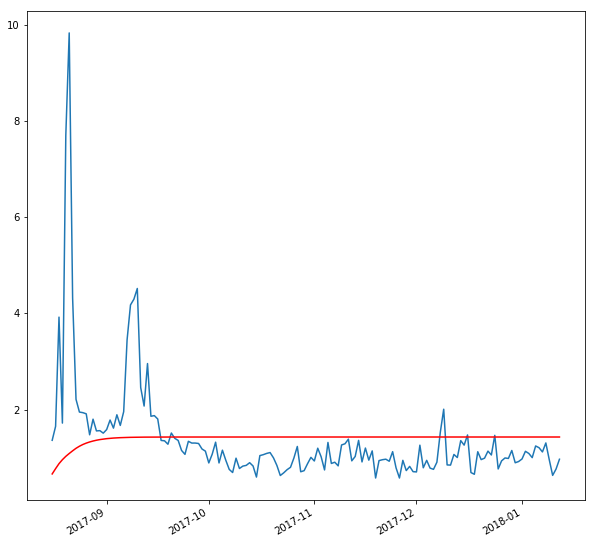

In [181]:
fig,ax = plt.subplots(figsize=(10,10))
plt.plot(test_dates[:150],test_avg[:150])
plt.plot(test_dates[:150],predictions, color='red')
ax.xaxis_date()     
fig.autofmt_xdate()

In [182]:
predictions_avg = np.array(predictions).flatten()

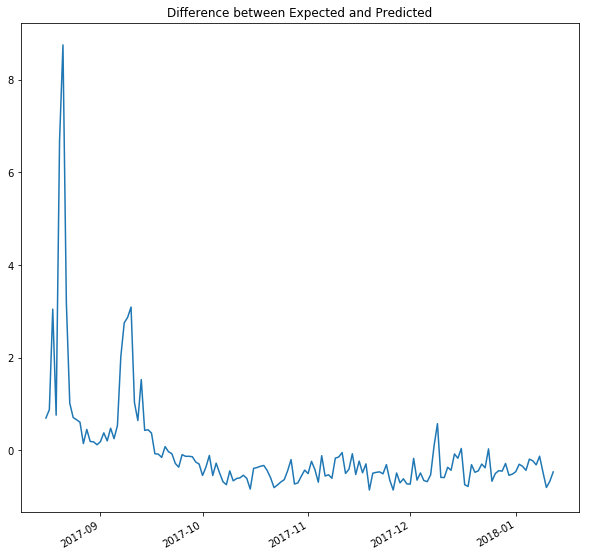

In [183]:
fig,ax = plt.subplots(figsize=(10,10))
plt.plot(test_dates[:150],test_avg[:150] - predictions_avg)
plt.title('Difference between Expected and Predicted')
ax.xaxis_date()     
fig.autofmt_xdate()

In [130]:
before_overdue_mean_wo_Crisis

,Days_taken_Normalized
SR_Type,
Container Problem,1.473685
Dead Animal Collection,0.501992
Drainage,0.669892
Flooding,0.748407
Missed Garbage Pickup,1.126062
New Resident Container,0.918292
Nuisance On Property,0.590974
Parking Violation,0.433741
Recycling Cart Repair or Replace,1.205079


In [132]:
# after_overdue_mean_wo_Crisis.Service_Request_Creation_Date = \
#                                 pd.to_datetime(after_overdue_mean_wo_Crisis.Service_Request_Creation_Date)

In [ ]:
# after_overdue_mean_wo_Crisis.loc[datetime.date(2017,8,16):datetime.date(2018,3,1),'Service_Request_Creation_Date']

In [ ]:
# after_overdue_mean_wo_Crisis[]\
#                                                          .Days_taken_Normalized.values

In [133]:
# train_avg,test_avg = before_overdue_mean_wo_Crisis[before_overdue_mean_wo_Crisis.Service_Request_Creation_Date < \
#                                            datetime.date(2017,8,16)].Days_taken_Normalized.values,\
#                             after_overdue_mean_wo_Crisis[after_overdue_mean_wo_Crisis.Service_Request_Creation_Date.loc\
#                                                          [datetime.date(2017,8,16):datetime.date(2018,3,1)]]\
#                                                          .Days_taken_Normalized.values

In [134]:
# history = [x for x in train_avg[:500:-1]]
# predictions = list()
# for t in range(len(test_avg[:100])):
#     model = ARIMA(history, order=(10,0,0))
#     model_fit = model.fit(disp=0)
#     output = model_fit.forecast()
#     yhat = output[0]
#     predictions.append(yhat)
#     obs = test_avg[t]
#     history.append(obs)
#     print('predicted=%f, expected=%f' % (yhat, obs))
# error = mean_squared_error(test_avg[:100], predictions)
# print('Test MSE: %.3f' % error)
# # plot
# pyplot.plot(test_dates[:100],test_avg[:100])
# pyplot.plot(test_dates[:100],predictions, color='red')
# pyplot.show()

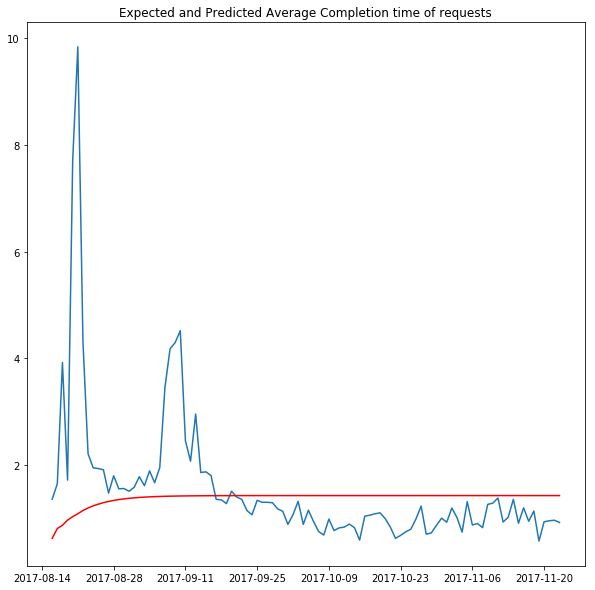

In [135]:
plt.figure(figsize=(10,10))
pyplot.plot(test_dates[:100],test_avg[:100])
pyplot.plot(test_dates[:100],predictions, color='red')
plt.title('Expected and Predicted Average Completion time of requests')
pyplot.show()

In [136]:
predictions_avg = np.array(predictions[:100]).flatten()

No handles with labels found to put in legend.


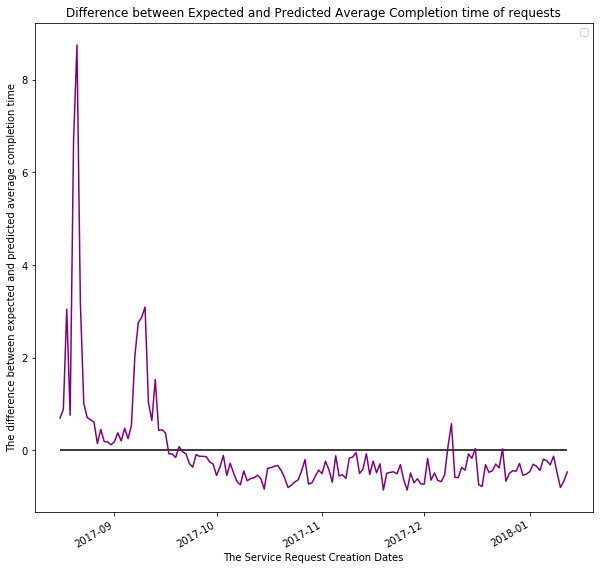

In [184]:
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(test_dates[:150],test_avg[:150] - predictions_avg,label='',color='purple')
plt.hlines(0,test_dates[0],test_dates[149],color='k')
plt.title('Difference between Expected and Predicted Average Completion time of requests')
plt.legend(loc='upper right')
plt.xlabel('The Service Request Creation Dates')
plt.ylabel('The difference between expected and predicted average completion time')
ax.xaxis_date()     
fig.autofmt_xdate()
plt.savefig('Diff_Mean_Completion_Time.png')